<a href="https://colab.research.google.com/github/josenomberto/UTEC-CDIAV3-MISTI/blob/main/day1_concept_challenge_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**



---



Si aún no lo ha hecho, presione:
`Archivo` -> `Guardar una copia a drive`

**para copiar este cuaderno en su unidad de Google y trabajar en una copia. ¡Si no hace esto, sus cambios no se guardarán!**

# Dimensionality Reduction and Principal Component Analysis

In [ ]:
# IMPORT PACKAGES

# General Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# PCA Packages
from sklearn.decomposition import PCA

# Data Processing Packages
from sklearn.preprocessing import StandardScaler


## Visualizing High-Dimensional Data



## EXERCISE: Visualize the Iris Dataset with Seaborn's Pairplot

First, get familiar with the iris dataset through a summary visualization of some of the data.

Tasks:

1. Plot the iris data using the function `sns.pairplot` from the `seaborn` package, where the hue is based on the iris species.
2. Explore the data and consider which two features seem to lead to good seperability of the three iris species.

In [ ]:
# TASK 1 EXERCISE

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Pairplot to visualize feature pairs
''' ADD CODE HERE '''

' ADD CODE HERE '

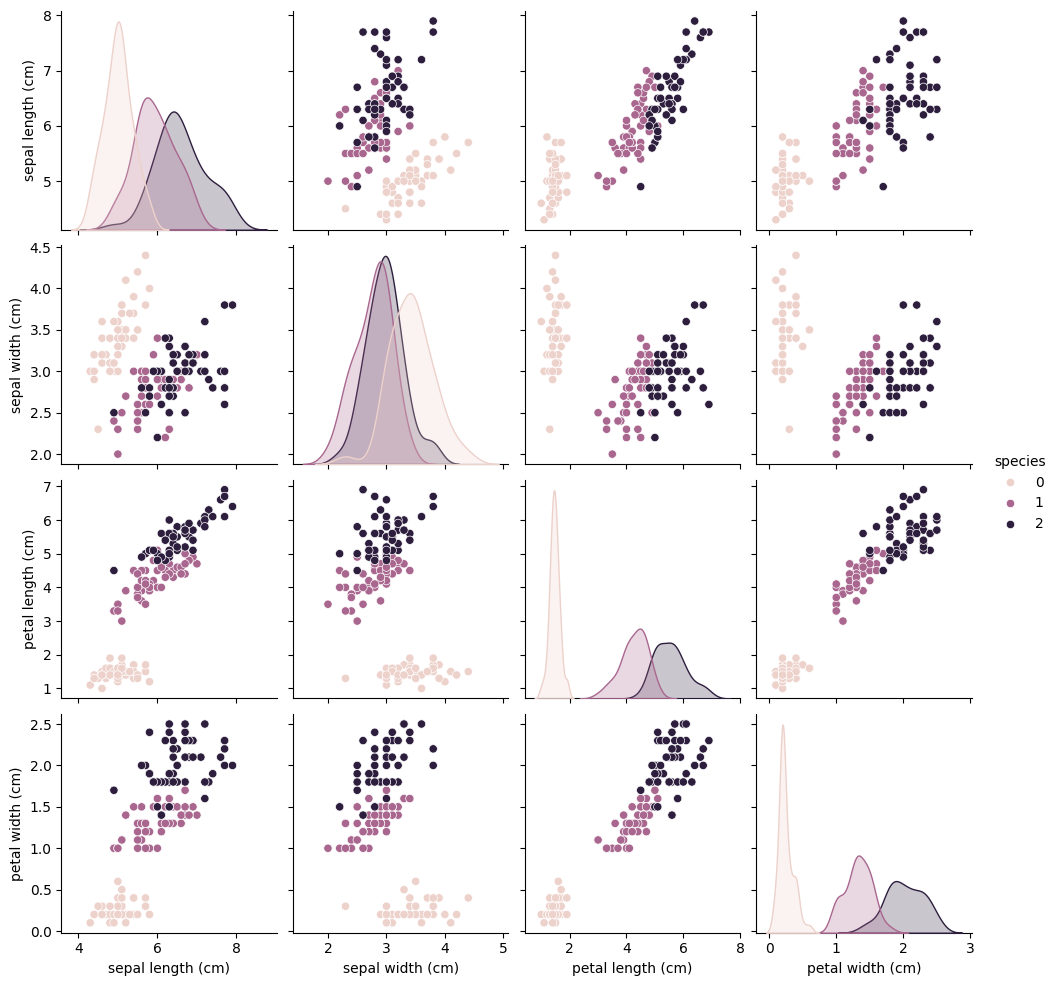

In [ ]:
# TASK 1 SOLUTION

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Pairplot to visualize feature pairs
sns.pairplot(df, hue='species')
plt.show()

## EXERCISE: Principle Component Analysis with a Synthetic Dataset

First, let's explore principle component analysis (PCA) with a synthetic dataset.

Tasks:
1. First, we have run PCA with one component and the we have plotted the direction of the learned first PCA component. Assess if the extracted PCA component fits your intuition.
2. Plot the PCA-transformed data (1D) into the original space (2D) with the help of the `inverse_transform` method from the PCA class from the package `sklearn`.

### TASK 1: Analyze the First Principle Component

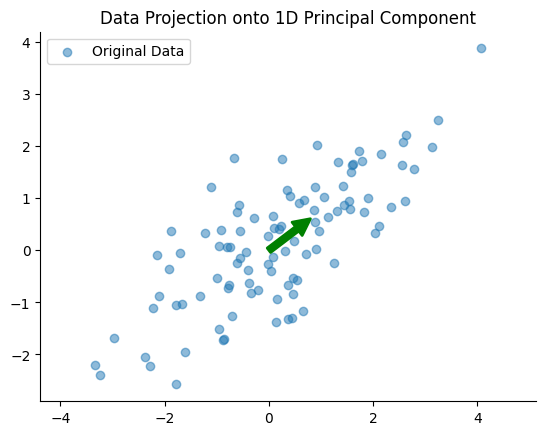

In [ ]:
# TASK 1 EXERCISE AND SOLUTION

# Generate a 2D dataset
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # Diagonal covariance
data = np.random.multivariate_normal(mean, cov, 100)

# Perform PCA (keep 1 principal component)
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data)

# Visualize the projection onto the first principal component
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')

# Plot the principal component as an arrow
plt.annotate('', xy=(pca.components_[0, 0], pca.components_[0, 1]), xytext=(0, 0),
             arrowprops=dict(facecolor='green', edgecolor='green', shrink=0, lw=2))

plt.title("Data Projection onto 1D Principal Component")
plt.legend()
plt.axis('equal')
sns.despine()
plt.show()

### TASK 2: Visualize the Projected Data

In [ ]:
# TASK 2 EXERCISE

# Project back to 2D for visualization
data_projected = <REPLACE ME AND MY ARROWS>

# Visualize the projection onto the first principal component
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')
plt.scatter(data_projected[:, 0], data_projected[:, 1], alpha=0.8, label='Projected Data', color='red')
plt.title("Data Projection onto 1D Principal Component")
plt.legend()
plt.axis('equal')
sns.despine()
plt.show()

SyntaxError: invalid syntax (<ipython-input-33-13b95874034e>, line 4)

In [ ]:
# TASK 2 SOLUTION

# Project back to 2D for visualization
data_projected = pca.inverse_transform(data_pca)

# Visualize the projection onto the first principal component
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')
plt.scatter(data_projected[:, 0], data_projected[:, 1], alpha=0.8, label='Projected Data', color='red')
plt.title("Data Projection onto 1D Principal Component")
plt.legend()
plt.axis('equal')
sns.despine()
plt.show()

NameError: name 'pca' is not defined

## PCA with the Iris Dataset

Now, we are going to do principle component analysis with the iris dataset.

First, we download the data into the following variables:
- `data`: This is the feature matrix containing the four features (sepal length, sepal width, petal length, petal width) for 150 samples.
- `target`: This is the array of labels corresponding to the species of each sample.
- `target_names`: These are the names of the species.

Tasks:
1. PCA-transform the iris dataset with `n_components` = 2 and then visualize your data.
2. Print the PCA components. These PCA components are also referred to as eigen vectors using the `components_` attribute from the PCA class from the package `sklearn`.
3. Print the explained variance by each component using the `explained_variance_ratio_` attribute from the PCA class from the package `sklearn`. *Remind yourself what the explained variance ratio refers to.*

In [ ]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

### TASK 1: PCA Transform the Data

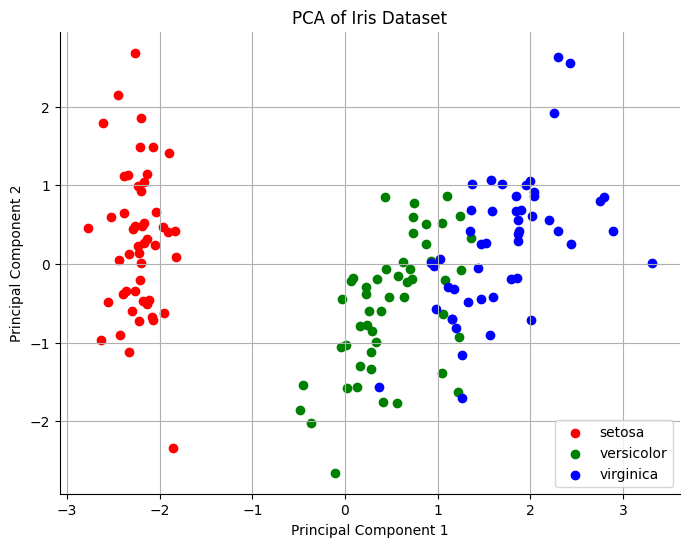

In [ ]:
# TASK 1 EXERCISE

# Standardizing the features
data_std = StandardScaler().fit_transform(data)

# PCA-transform the standardized features
''' ADD YOUR CODE HERE '''

# Perform PCA, reducing the dataset to 2 components


# Convert to a DataFrame for easier plotting


# Plotting



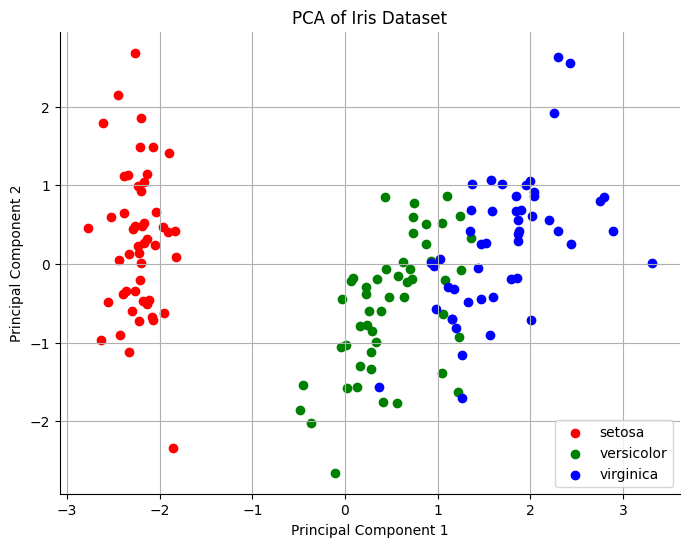

In [ ]:
# TASK 1 SOLUTION

# Standardizing the features
data_std = StandardScaler().fit_transform(data)

# Perform PCA, reducing the dataset to 2 components
pca = PCA(n_components=2)
pca_transformed_data = pca.fit_transform(data_std)

# Convert to a DataFrame for easier plotting
principal_df = pd.DataFrame(data=pca_transformed_data, columns=['PC1', 'PC2'])
principal_df['species'] = target

# Plotting
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for species, color in zip([0, 1, 2], colors):
    subset = principal_df[principal_df['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=target_names[species], color=color)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
sns.despine()
plt.legend()
plt.grid(True)
plt.show()

### TASK 2: Print the PCA Component Vectors

In [ ]:
# TASK 2 EXERCISE

# Print the vectors of the PCA component directions (eigenvectors)
''' ADD YOUR CODE HERE '''

In [ ]:
# TASK 2 SOLUTION

# Print the vectors of the PCA component directions (eigenvectors)
print("PCA Component Directions (Eigenvectors):")
print(pca.components_)

PCA Component Directions (Eigenvectors):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


### TASK 3: Print the Explained Variance

In [ ]:
# TASK 3 EXERCISE

# Explained variance by each component
''' ADD YOUR CODE HERE '''

In [ ]:
# TASK 3 SOLUTION

# Explained variance by each component
print("\nExplained variance by each component:")
print(pca.explained_variance_ratio_)


Explained variance by each component:
[0.72962445 0.22850762]
